In [35]:
import os
import pandas as pd
import numpy as np
import math
import pickle

In [36]:
df_louvain_sup = pd.read_csv('louvain_sup_communities.csv')
df_louvain_conf = pd.read_csv('louvain_conf_communities.csv')
df_label_prop_sup = pd.read_csv('label_propagation_sup_communities.csv')
df_label_prop_conf = pd.read_csv('label_propagation_conf_communities.csv')

# UNIFORM DATA FRAMES SO THAT EACH HAS THE SAME COLUMN NAMES
df_louvain_sup = df_louvain_sup.drop(['intermediateCommunityIds'], axis=1)
df_louvain_conf = df_louvain_conf.drop(['intermediateCommunityIds'], axis=1)
df_label_prop_sup.columns =['name', 'communityId']
df_label_prop_conf.columns =['name', 'communityId']


community_dict = {
    "LouSupp": df_louvain_sup.sort_values(by=['name']),
    "LouConf": df_louvain_conf.sort_values(by=['name']),
    "LabSupp": df_label_prop_sup.sort_values(by=['name']),
    "LabConf": df_label_prop_conf.sort_values(by=['name'])

}

community_dict['LouSupp'].head()

,name,communityId
0,21_Savage,54
1,2_Chainz,54
2,50_Cent,7
3,A$AP_Ferg,7
4,A$AP_Rocky,7


In [37]:
comm_ids = {}
for key in community_dict:
    c = set(community_dict[key]['communityId'].tolist())
    comm_ids[key] = c
    print(c)


print()

# Update the community IDs to start at zero and continue consecutively.
for key in community_dict:
    df_temp = community_dict[key]
    L = list(comm_ids[key])
    for i in range(len(df_temp)):
        df_temp.at[i, 'communityId'] = L.index(df_temp.at[i, 'communityId'])
    community_dict[key] = df_temp

    
new_comm_ids = {}
for key in community_dict:
    c = set(community_dict[key]['communityId'].tolist())
    new_comm_ids[key] = c
    print(c)

{42, 31, 54, 7}
{7, 42, 11, 22, 31}
{342, 331, 358, 303}
{304, 385, 342, 399}

{0, 1, 2, 3}
{0, 1, 2, 3, 4}
{0, 1, 2, 3}
{0, 1, 2, 3}


In [38]:
community_dict['LouSupp'].head(10)

,name,communityId
0,21_Savage,2
1,2_Chainz,2
2,50_Cent,3
3,A$AP_Ferg,3
4,A$AP_Rocky,3
5,A_Boogie_Wit_da_Hoodie,3
6,Adele,0
7,Aminé,3
8,Ariana_Grande,1
9,Avicii,1


In [39]:
community_dict['LouConf'].head(10)

,name,communityId
0,21_Savage,2
1,2_Chainz,2
2,50_Cent,3
3,A$AP_Ferg,2
4,A$AP_Rocky,3
5,A_Boogie_Wit_da_Hoodie,0
6,Adele,1
7,Aminé,0
8,Ariana_Grande,4
9,Avicii,4


In [40]:
list_spotify = pd.read_pickle('spotify_ground_truth_data.pkl')
list_spotify[0]

['spotify:artist:17lzZA2AlOHwCwFALHttmp',
 '2_Chainz',
 ['DJ_Drama',
  'Waka_Flocka_Flame',
  'Juicy_J',
  'Yo_Gotti',
  'Rick_Ross',
  'Young_Money',
  'Ace_Hood',
  'Wale',
  'Jeezy',
  'Birdman',
  'Mike_WiLL_Made-It',
  'Big_K.R.I.T.',
  'Curren$y',
  'Gucci_Mane',
  'Rich_Homie_Quan',
  'Young_Scooter',
  'Young_Dolph',
  'Quavo',
  'Jay_Rock',
  'French_Montana']]

In [41]:
spotify_artist_list = []

for artist_obj in list_spotify:
    spotify_artist_list.append(artist_obj[1]) # we also need to add the 'source' artists
    for related_artist in artist_obj[2]:
        spotify_artist_list.append(related_artist)

print(len(spotify_artist_list), "artists in total")
spotify_artist_set = set(spotify_artist_list)
print(len(spotify_artist_set), "distinct artists")

2100 artists in total
730 distinct artists


In [42]:
artist_clusters_dict = {}
for key in community_dict:
    df = community_dict[key]
    community_ids = set(df['communityId'])
    artist_clusters = []

    for i in community_ids:
        artist_clusters.append((df[df['communityId'] == i])['name'].tolist())

    artist_clusters_dict[key] = artist_clusters

    print("*************", key, "*************")
    print(artist_clusters)
    print()

************* LouSupp *************
[['Adele', 'Beyoncé', 'Britney_Spears', 'Bruno_Mars', 'Chris_Brown', 'Coldplay', 'Demi_Lovato', 'Ed_Sheeran', 'Flo_Rida', 'Imagine_Dragons', 'Jason_Derulo', 'Jeremih', 'John_Mayer', 'Justin_Bieber', 'Justin_Timberlake', 'Katy_Perry', 'Lady_Gaga', 'Maroon_5', 'Miley_Cyrus', 'Nelly', 'Nicki_Minaj', 'OneRepublic', 'Pitbull', 'Rihanna', 'Sam_Smith', 'Selena_Gomez', 'Shawn_Mendes', 'Trey_Songz', 'Usher'], ['Ariana_Grande', 'Avicii', 'Calvin_Harris', 'DJ_Snake', 'David_Guetta', 'Flume', 'Kygo', 'Major_Lazer', 'Martin_Garrix', 'Sia', 'The_Chainsmokers', 'Twenty_One_Pilots', 'Zara_Larsson', 'Zedd'], ['21_Savage', '2_Chainz', 'Big_Sean', 'Chance_The_Rapper', 'Childish_Gambino', 'DJ_Khaled', 'DRAM', 'Fetty_Wap', 'French_Montana', 'Future', 'G-Eazy', 'Gucci_Mane', 'J._Cole', 'KYLE', 'Kendrick_Lamar', 'Khalid', 'Kodak_Black', 'Lil_Uzi_Vert', 'Logic', 'Meek_Mill', 'Migos', 'Post_Malone', 'Rae_Sremmurd', 'The_Weeknd', 'Travis_Scott', 'Ty_Dolla_$ign', 'Young_Thug']

In [43]:
for key in artist_clusters_dict:
    print(key, "->", len(artist_clusters_dict[key]), "clusters with the size of:")
    for cluster in artist_clusters_dict[key]:
        print(len(cluster))
    print()

LouSupp -> 4 clusters with the size of:
29
14
27
30

LouConf -> 5 clusters with the size of:
17
29
23
17
14

LabSupp -> 4 clusters with the size of:
18
14
7
61

LabConf -> 4 clusters with the size of:
61
7
19
13



In [48]:
spotify_artist_clusters = []
max_len = 1
for artist_obj in list_spotify:
    temp_cluster = []
    temp_cluster.append(artist_obj[1]) # also append the source artist 
    for related_artist in artist_obj[2]:
        if related_artist in df_louvain_sup['name'].tolist():
            temp_cluster.append(related_artist)

    if len(temp_cluster) > 1:
        if len(temp_cluster) > max_len:
            max_len = len(temp_cluster)
        print(len(temp_cluster))
        spotify_artist_clusters.append(temp_cluster)
        print(temp_cluster)
        print()

print(len(spotify_artist_clusters))



6
['2_Chainz', 'Waka_Flocka_Flame', 'Yo_Gotti', 'Wale', 'Gucci_Mane', 'French_Montana']

13
['Big_Sean', 'Wale', '2_Chainz', 'ScHoolboy_Q', 'Meek_Mill', 'French_Montana', 'Ty_Dolla_$ign', 'Jeremih', 'Waka_Flocka_Flame', 'Yo_Gotti', 'YG', 'A$AP_Ferg', 'Kid_Ink']

13
['DJ_Khaled', 'Yo_Gotti', 'French_Montana', 'Meek_Mill', '2_Chainz', 'T.I.', 'Kid_Ink', 'Wale', 'Gucci_Mane', 'T-Pain', 'Lil_Wayne', 'Big_Sean', 'Ty_Dolla_$ign']

17
['Drake', 'Big_Sean', 'Meek_Mill', 'Jeremih', 'Wale', '2_Chainz', 'J._Cole', 'DJ_Khaled', 'PARTYNEXTDOOR', 'French_Montana', 'Bryson_Tiller', 'Ty_Dolla_$ign', 'Young_Thug', 'Tyga', 'Lil_Wayne', 'Future', 'Kendrick_Lamar']

12
['Future', 'Young_Thug', '2_Chainz', 'Meek_Mill', 'Yo_Gotti', 'French_Montana', 'Gucci_Mane', 'Waka_Flocka_Flame', 'Migos', 'Kodak_Black', '21_Savage', 'Lil_Yachty']

4
['Gucci_Mane', 'Yo_Gotti', 'Waka_Flocka_Flame', '2_Chainz']

9
['J._Cole', 'Big_Sean', 'Wale', 'Kendrick_Lamar', 'ScHoolboy_Q', '2_Chainz', 'Meek_Mill', 'A$AP_Rocky', 'Kid_C

In [49]:
from sklearn.metrics.cluster import adjusted_rand_score

In [50]:
keys = list(community_dict.keys())

aris = []

for i in range(4):
    for j in range(i+1, 4):
        ari = adjusted_rand_score(community_dict[keys[i]]['communityId'].tolist(),
                                  community_dict[keys[j]]['communityId'].tolist())
        print("ari (", keys[i], ",", keys[j], ") =", round(ari,5))
        aris.append(round(ari,5))
print()
print(aris)

ari ( LouSupp , LouConf ) = 0.7313
ari ( LouSupp , LabSupp ) = 0.44851
ari ( LouSupp , LabConf ) = 0.43558
ari ( LouConf , LabSupp ) = 0.3228
ari ( LouConf , LabConf ) = 0.30993
ari ( LabSupp , LabConf ) = 0.98718

[0.7313, 0.44851, 0.43558, 0.3228, 0.30993, 0.98718]


In [51]:
for key in artist_clusters_dict:
    clusters = artist_clusters_dict[key]

    all_comparisons = 0  # all artist pairs in all clusters
    cluster_inter = 0
    for cluster in clusters:
        for i in range(len(cluster)):
            for j in range(i+1, len(cluster)):
                artist1 = cluster[i]
                artist2 = cluster[j]
                artist_pair = [artist1, artist2]
                all_comparisons = all_comparisons + 1
                for spotify_cluster in spotify_artist_clusters:
                    if len(set(artist_pair).intersection(set(spotify_cluster))) == 2:
                        cluster_inter = cluster_inter + 1
                        break

    print(key, "->", cluster_inter, "/", all_comparisons, "=",
          round(cluster_inter*100/all_comparisons,2), "%")

LouSupp -> 379 / 1283 = 29.54 %
LouConf -> 320 / 1022 = 31.31 %
LabSupp -> 647 / 2095 = 30.88 %
LabConf -> 650 / 2100 = 30.95 %


In [52]:
artist_pairs_dict = {}
for key in artist_clusters_dict:
    artist_pairs = []
    for cluster in artist_clusters_dict[key]:
        for i in range(len(cluster)):
            for j in range(i+1, len(cluster)):
                artist1 = cluster[i]
                artist2 = cluster[j]
                artist_pair = sorted([artist1, artist2])
                artist_pairs.append(artist_pair)
    artist_pairs_dict[key] = artist_pairs

for key in artist_pairs_dict:
    print(key, "->", len(artist_pairs_dict[key]))

print()

artist_pairs_sets = {}
for key in artist_pairs_dict:
    pairs_set = set(tuple(i) for i in artist_pairs_dict[key])
    artist_pairs_sets[key] = pairs_set
    print(key, "->", len(pairs_set))

LouSupp -> 1283
LouConf -> 1022
LabSupp -> 2095
LabConf -> 2100

LouSupp -> 1283
LouConf -> 1022
LabSupp -> 2095
LabConf -> 2100


In [53]:
spotify_artist_pairs = []
for cluster in spotify_artist_clusters:
    for i in range(len(cluster)):
        for j in range(i+1, len(cluster)):
            pair = sorted([cluster[i], cluster[j]])
            spotify_artist_pairs.append(pair)
print(len(spotify_artist_pairs))

spotify_artist_set = set(tuple(i) for i in spotify_artist_pairs)
print(len(spotify_artist_set))

1649
718


In [54]:
def overlap_coefficient(set1, set2):
    n = len(set1.intersection(set2))
    min_len = min(len(set1), len(set2))
    oc = round(n / min_len, 4)
    print(n, "/", min_len, "=", oc)
    return oc

In [55]:
for key in artist_pairs_sets:
    print(key, "& Spotify")
    oc = overlap_coefficient(artist_pairs_sets[key], spotify_artist_set)

LouSupp & Spotify
379 / 718 = 0.5279
LouConf & Spotify
320 / 718 = 0.4457
LabSupp & Spotify
647 / 718 = 0.9011
LabConf & Spotify
650 / 718 = 0.9053


In [56]:
keys = list(artist_pairs_sets.keys())

for i in range(4):
    for j in range(i+1,4):
        print(keys[i], "&", keys[j])
        oc = overlap_coefficient(artist_pairs_sets[keys[i]], artist_pairs_sets[keys[j]])

LouSupp & LouConf
914 / 1022 = 0.8943
LouSupp & LabSupp
1057 / 1283 = 0.8239
LouSupp & LabConf
1044 / 1283 = 0.8137
LouConf & LabSupp
796 / 1022 = 0.7789
LouConf & LabConf
783 / 1022 = 0.7661
LabSupp & LabConf
2082 / 2095 = 0.9938


In [57]:
d = {'name': community_dict['LouSupp']['name'],
     'LouSupp': community_dict['LouSupp']['communityId'],
     'LouConf': community_dict['LouConf']['communityId'] ,
     'LabSupp': community_dict['LabSupp']['communityId'],
     'LabConf': community_dict['LabConf']['communityId']}
df = pd.DataFrame(data=d)

df.head(20)

,name,LouSupp,LouConf,LabSupp,LabConf
0,21_Savage,2,2,3,0
1,2_Chainz,2,2,3,0
2,50_Cent,3,3,3,0
3,A$AP_Ferg,3,2,3,0
4,A$AP_Rocky,3,3,3,0
5,A_Boogie_Wit_da_Hoodie,3,0,3,0
6,Adele,0,1,3,0
7,Aminé,3,0,3,0
8,Ariana_Grande,1,4,3,0
9,Avicii,1,4,3,0


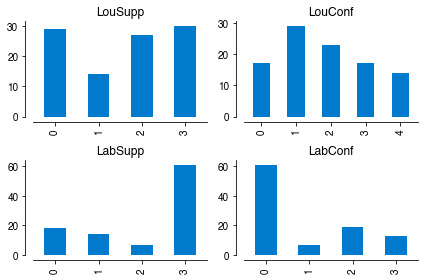

In [58]:
import matplotlib.pyplot as plt
artist_classes = list(community_dict.keys())

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(6,4))

for artist_class in artist_classes:
    df = df
    num_of_classes = len(df[artist_class].unique())
    artists_grouped_by_class = df.groupby(artist_class).count().reset_index()
    d = {artist_class: artists_grouped_by_class[artist_class],
         'Artists': artists_grouped_by_class['name']}
    df_dist = pd.DataFrame(data=d)

    # unpack all the axes subplots
    axe = axes.ravel()
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Helvetica'
    # assign the plot to each subplot in axe
    for i, c in enumerate(df_dist.columns):
        plt.tight_layout()
        axe[artist_classes.index(artist_class)].set_xlabel('')
        axe[artist_classes.index(artist_class)].set_title(artist_class)
        axe[artist_classes.index(artist_class)].spines['top'].set_visible(False)
        axe[artist_classes.index(artist_class)].spines['right'].set_visible(False)
        #axe[artist_classes.index(artist_class)].spines['left'].set_bounds(0, max(df_dist['Artists'])+10)
        #axe[artist_classes.index(artist_class)].set_xlim(0,25)
        # add some space between the axis and the plot
        axe[artist_classes.index(artist_class)].spines['left'].set_position(('outward', 8))
        axe[artist_classes.index(artist_class)].spines['bottom'].set_position(('outward', 5))
        df_dist[c].plot(x=artist_class, y=['Artists'], kind="bar",
                         logy=False, ax=axe[artist_classes.index(artist_class)],
                         color=['#007acc'])
    
